<a href="https://colab.research.google.com/github/OseiasBeu/Data-Science/blob/master/Base_De_Anuncios_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [71]:
df_dados = pd.read_csv("https://raw.githubusercontent.com/OseiasBeu/Data-Science/master/DataSets/Advertising.csv")

In [72]:
#verificando a estrutura dos dados importados: são 200 linhas e 5 colunas
print(f'DImenssão do datafame: {df_dados.shape}')
print('\n')
print(f'''verificando o conteúdo das peimeiras 5 linhas do dataset:\n''')
df_dados.head(5)


DImenssão do datafame: (200, 5)


verificando o conteúdo das peimeiras 5 linhas do dataset:



,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Gerando a descrição: Média, Contagem, Desvio Padrão,Min-Max e quartis:

In [68]:
df_dados.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Removendo a coluna Unnamed: 0, pois ela contém apenas os indices, \n portanto, nesse momento ela não possui relevância

In [64]:
# print("Removendo a coluna Unnamed: 0, pois ela contém apenas os indices, \n portanto, nesse momento ela não possui relevância")
# df_dados.drop(['Unnamed: 0'], axis=1,inplace= True)
df_dados


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [70]:
df_dados.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Como podemos observar acima, existe clarametne uma correlação entre a quantidade de dinheiro investido em anúncios de  televisões e as vendas. Por isso, vamos analisar o comportamento do que é gasto com TV em relação ao retonro de vendas:

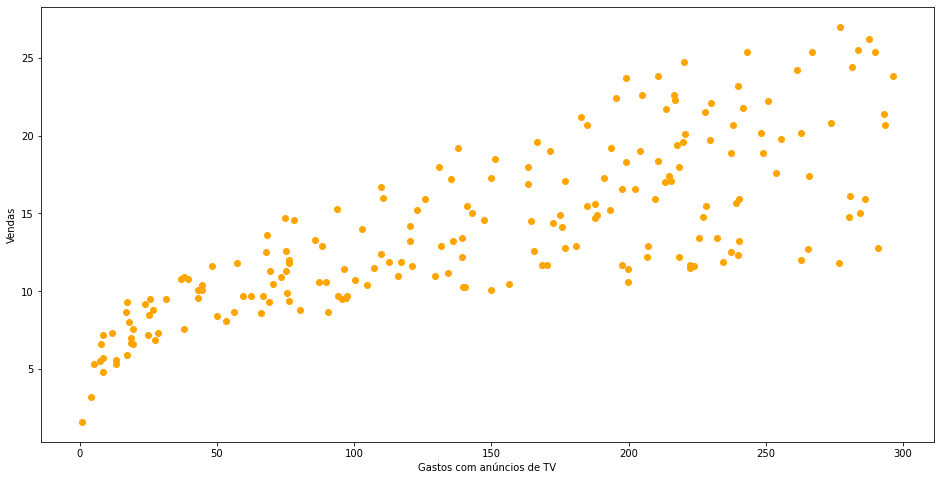

In [63]:
# print('''
# Como podemos observar acima, existe clarametne uma correlação entre a quantidade \n de dinheiro investido em anúncios de  televisões e as vendas. \n\n Por isso, vamos analisar o comportamento do que é gasto com TV em relação ao \n retonro de vendas:
# ''')

plt.figure(figsize = (16,8))
plt.scatter(
    df_dados['TV'],
    df_dados['sales'],
    c='orange'
)
plt.xlabel('Gastos com anúncios de TV')
plt.ylabel('Vendas')
plt.show()

In [62]:
X_teste = df_dados['TV'].values.reshape(-1,1)
y_teste = df_dados['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X_teste, y_teste)


print("O modelo é: Vendas = {:.5} + {:.5}X_teste".format(reg.intercept_[0], reg.coef_[0][0]))

# print(''' \n\n
# No nosso modelo, os dois primeiros valores são as constantes geradas pelo modelo \n
# x_teste = Valor investido em propagandas de TV \n
# Essa básicamente é a conta que nos mosta o ROI (Retorno sobre o investimento)
# ''')

O modelo é: Vendas = 7.0326 + 0.047537X_teste


No nosso modelo, os dois primeiros valores são as constantes geradas pelo modelo

>x_teste = Valor investido em propagandas de TV

Essa básicamente é a conta que nos mosta o ROI (Retorno sobre o investimento)

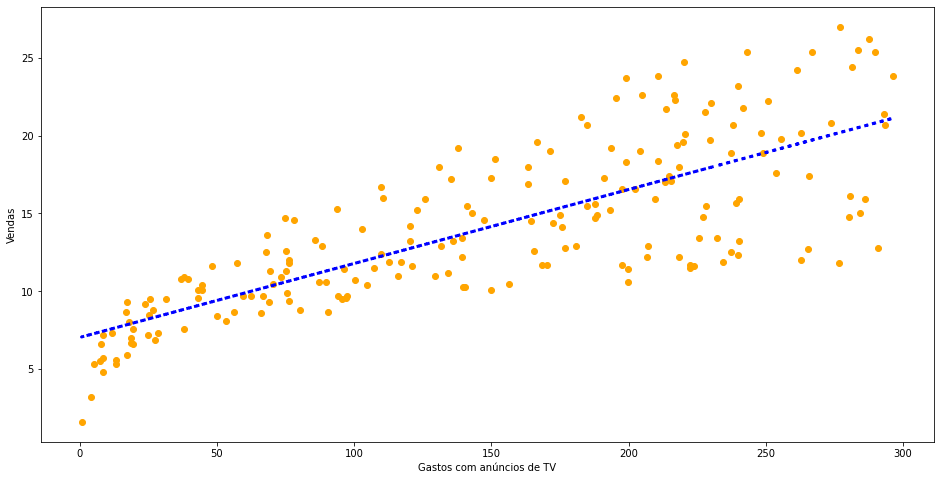

In [44]:
f_previsaoes = reg.predict(X_teste)


plt.figure(figsize = (16,8))
plt.scatter(
    df_dados['TV'], 
    df_dados['sales'], 
    c='orange')


plt.plot(
    df_dados['TV'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel('Gastos com anúncios de TV')
plt.ylabel('Vendas')
plt.show()

Para finalizar, vou analisar a precisão do modelo e sua qualidaade através \n do R² e do valor de P:

In [46]:
# print('Para finalizar, vou analisar a precisão do modelo e sua qualidaade através \n do R² e do valor de P:\n')
X = df_dados['TV']
y = df_dados['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Para finalizar, vou analisar a precisão do modelo e sua qualidaade através 
 do R² e do valor de P:

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.47e-42
Time:                        17:09:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

>  'R²: Como podemos ver acima o R² está em 0.612, isso significa que aproximadamente 
60% do comportamento da variável vendas é explicado pela variável TV


>  Valor-P: Olhando para o p-value vamos que ele está próximo a zero,
isso nos faz rejeitar a hipótese nula. Entao podemos dizer que significa que há 
uma significância estatística forte entre o resultado e esse coeficiente.

## Construindo um modelo com mais variáveis de entrada:

In [61]:
# print('''
# Construindo um modelo com mais variáveis de entrada:
# ''')
Xs = df_dados.drop(['sales'], axis=1)
y = df_dados['sales'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(Xs, y)


print("O modleo é: Vendas = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))


O modleo é: Vendas = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


Como vimos anteriormente, essa é a conta matemática construída pelo modelo que nos
ajuda a prever o quanto teremos de retorno a partir dos investimentos que decidimos 
fazer! Uma observação importante é que esse modelo não é capaz de explicar o impact
individual de cada investimento, ou seja, ele não consegue separar o valor de cada 
dimensão no resultado em vendas.

Mas, parecido com o que fizemos antes, vamos analisar a precisão do nosso modelo:

In [59]:
X = np.column_stack((df_dados['TV'], df_dados['radio'], df_dados['newspaper']))
y = df_dados['sales']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.58e-96
Time:                        17:26:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Agora temos um modelo muito melhor, onde quase 90% dos resultados em vendas são
explicados pelas variáveis que temos.

Além disso, por estarmos trabalhando ocm mais de uma entrada, é importante olhar
para a Estatistica-F, que nos diz que temos uma variância muito alta em nosso 
conjunto de dados, isso pode ser explicado pelo tamanho do nosso dataset.

No valor de P, da terceira variável, (investimetnos em newspaper (jornais))
o valor está muito alto, quase atingindo 1.0, ou seja, podemos dizer que essa variável
não possui relevância estatística em nosso modelo. -> Sabendo disso podemos remover
essa variável pois isso tornaria nosso modelo melhor ainda.